In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/home/huu/anaconda3/envs/python_3_7/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/huu/anaconda3/envs/python_3_7/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
model.compile(optimizer='rmsprop', 
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 277us/sample - loss: 0.5385 - acc: 0.7665 - val_loss: 0.4202 - val_acc: 0.8453
Epoch 2/20
15000/15000 [==============================] - 4s 267us/sample - loss: 0.3244 - acc: 0.9019 - val_loss: 0.3123 - val_acc: 0.8884
Epoch 3/20
15000/15000 [==============================] - 4s 291us/sample - loss: 0.2314 - acc: 0.9260 - val_loss: 0.2820 - val_acc: 0.8901
Epoch 4/20
15000/15000 [==============================] - 6s 373us/sample - loss: 0.1797 - acc: 0.9439 - val_loss: 0.2798 - val_acc: 0.8887
Epoch 5/20
15000/15000 [==============================] - 5s 363us/sample - loss: 0.1420 - acc: 0.9575 - val_loss: 0.2851 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 4s 236us/sample - loss: 0.1162 - acc: 0.9661 - val_loss: 0.2967 - val_acc: 0.8866
Epoch 7/20
15000/15000 [==============================] - 4s 256us/sample - loss: 0.0958 - acc: 0.9727 - val_l

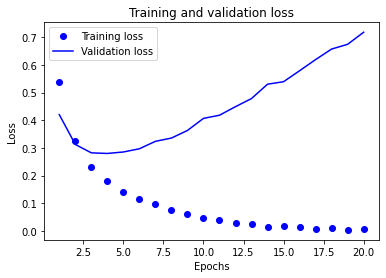

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20 + 1)

plt.plot(epochs, loss_value, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model.predict(x_test)

array([[1.4050305e-03],
       [9.9999696e-01],
       [4.7046834e-01],
       ...,
       [3.5396218e-04],
       [3.5116374e-03],
       [8.9816427e-01]], dtype=float32)